<a href="https://colab.research.google.com/github/Pratyush1110/Machine-Learning/blob/main/HandsOnML/Chp2/Chp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def load_housing_data():
  csv_path = "/content/drive/MyDrive/ML Project/housing.csv"
  return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


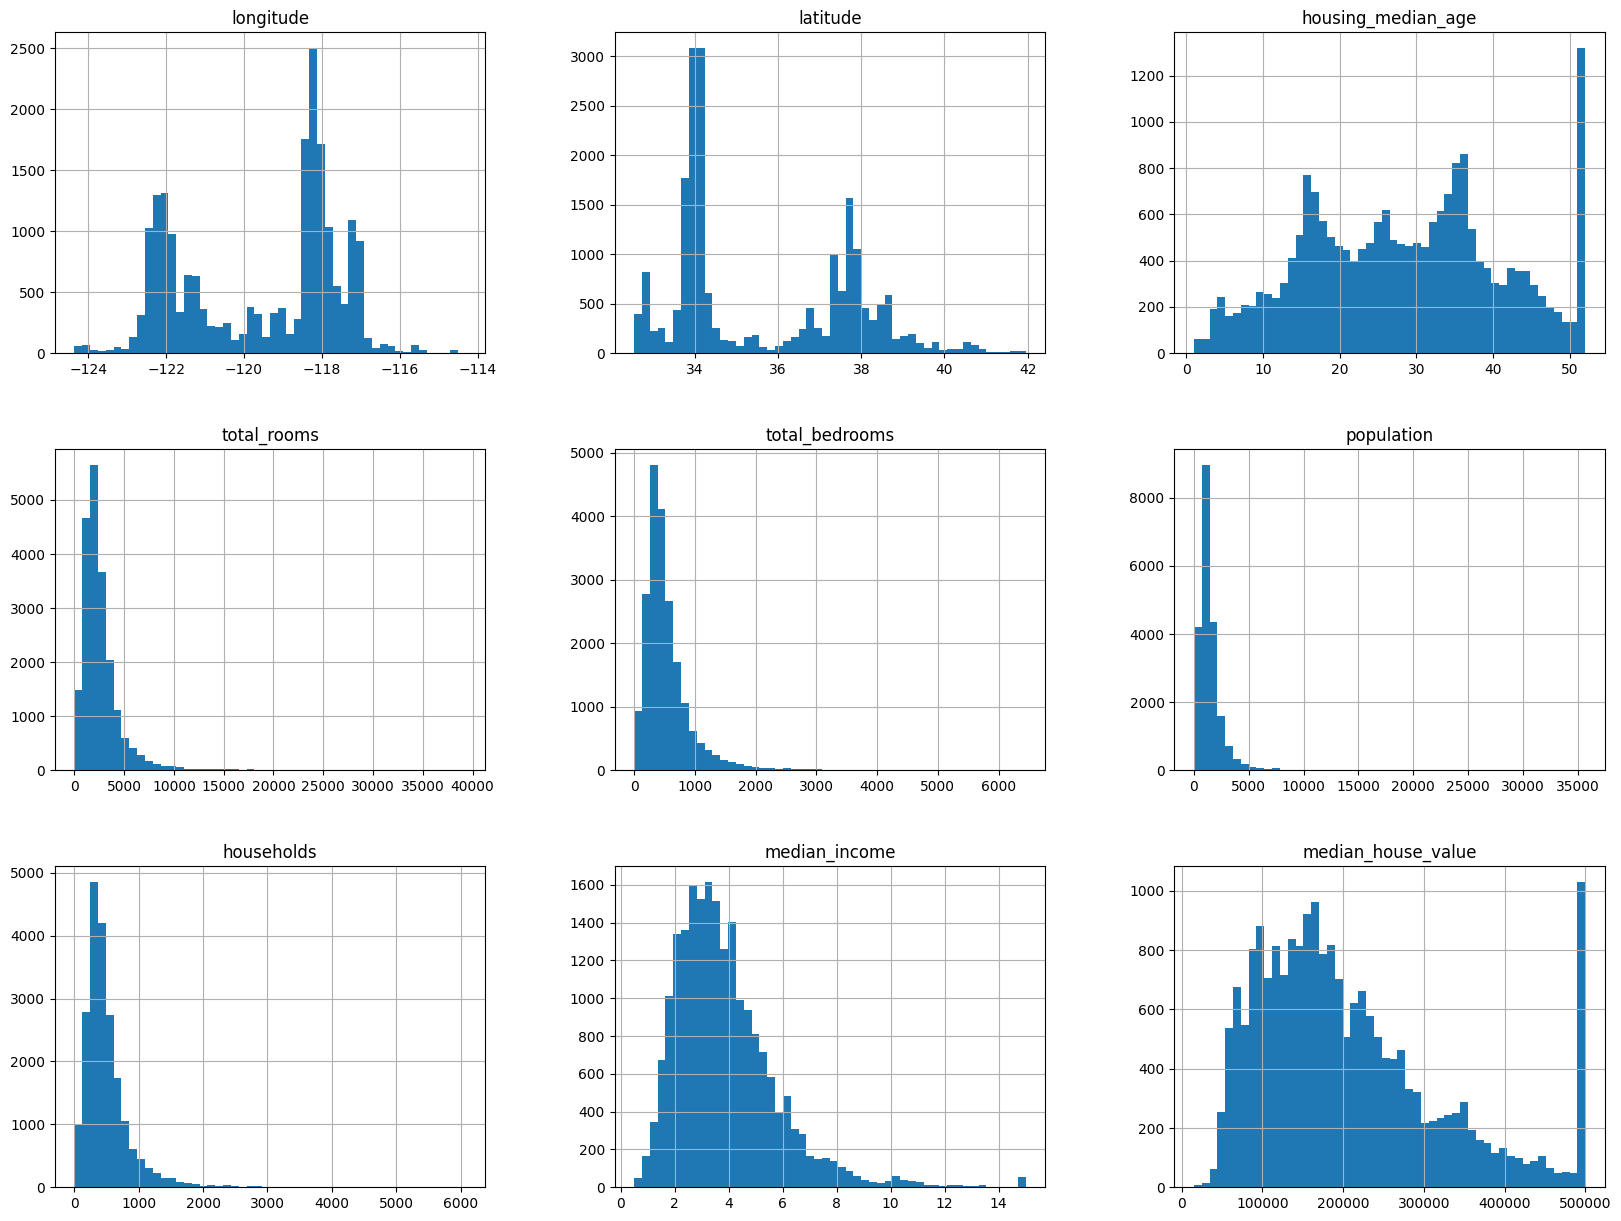

In [12]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# **Splitting data into training set and testing set.**

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

/tmp/ipython-input-238931313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


<Axes: >

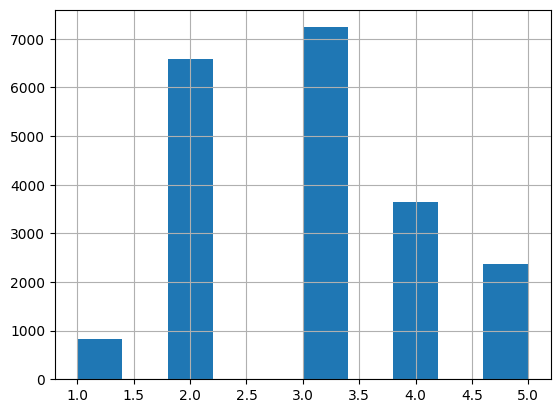

In [15]:
housing["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3.0,0.350533
2.0,0.318798
4.0,0.176357
5.0,0.114341
1.0,0.039971


In [18]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

# **Discovering and Visualizing the Data to gain insights.**

In [19]:
housing = strat_train_set.copy()

Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

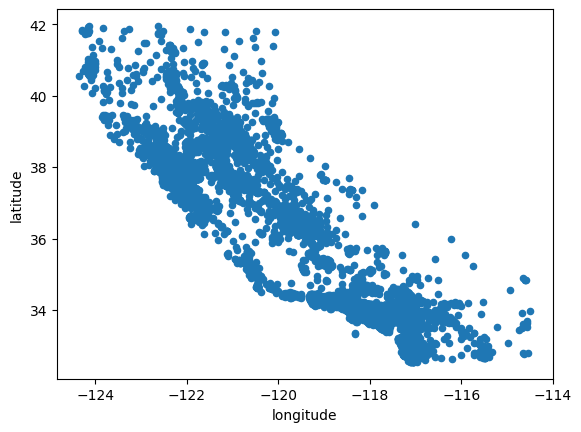

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

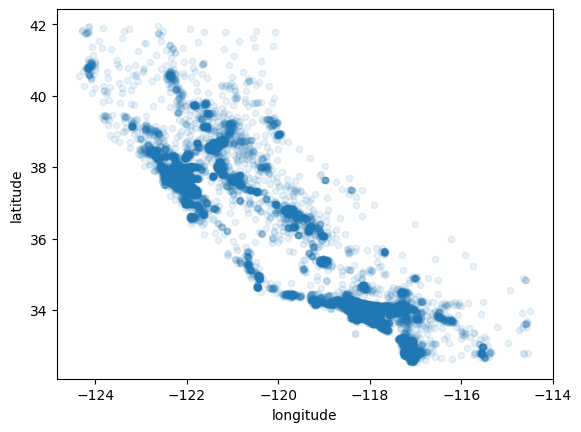

In [21]:
#Setting the alpha to 0.1 makes it much easier to visualize places with high density of data points

#You can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego,
#plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

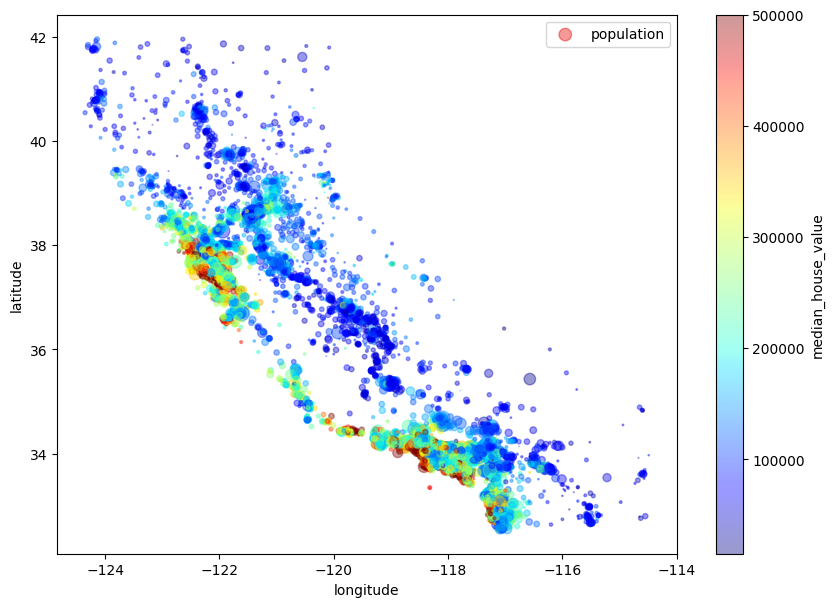

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Looking for Correlations (Pearson's Coefficient 'r')

In [23]:
corr_matrix = housing.corr(numeric_only = True)

In [24]:
corr_matrix["median_house_value"].sort_values(ascending = False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

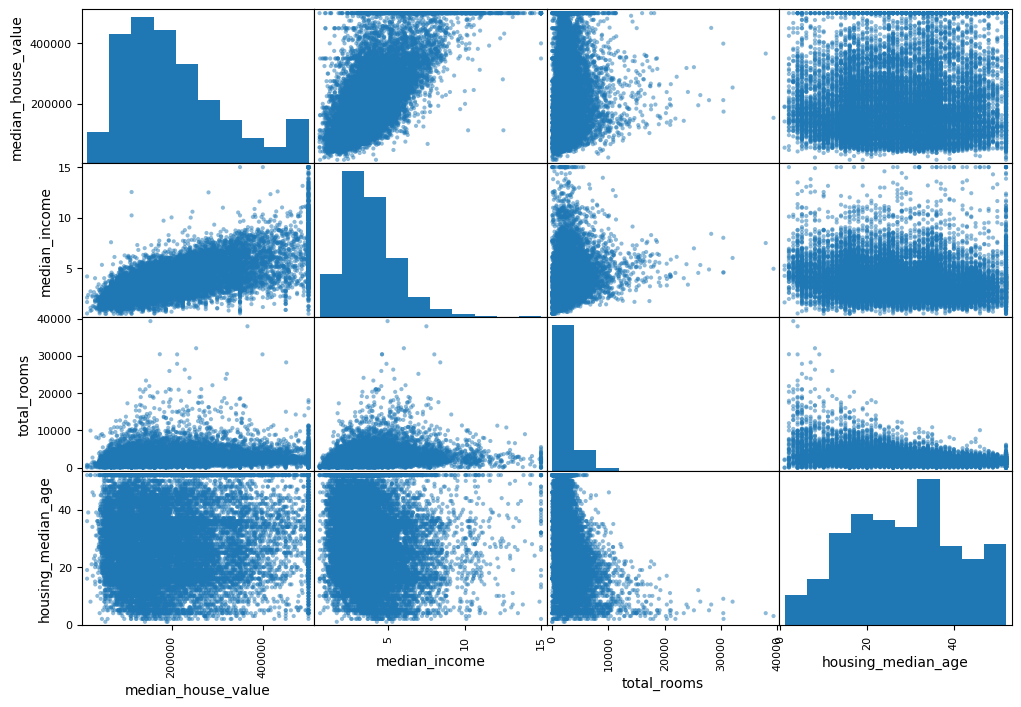

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

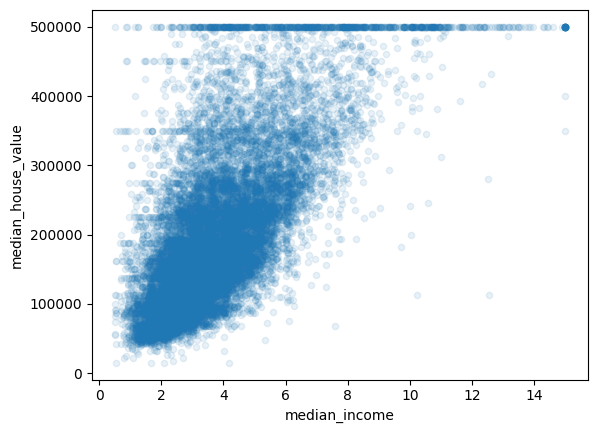

In [26]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

# **Experimenting with Attribute Combinations**

In [27]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [28]:
corr_matrix = housing.corr(numeric_only = True)

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_household,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
population_per_household,-0.038224
longitude,-0.050859


# **Preparing the Data for Machine Learning Algorithms**

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Data Cleaning

In [31]:
#total_bedrooms attribute has missing values, to fix this, we have 3 options:
#1. get rid of the corresponding districts
#2. get rid of the whole attribute
#3. set the values to some value

housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

/tmp/ipython-input-3683862645.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


In [32]:
#creating a imputer class from sklearn to handle missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [33]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [37]:
X = imputer.transform(housing_num)

# **Handling Text and Categorical Attributes**

In [38]:
housing_cat = housing[["ocean_proximity"]]

In [39]:
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [40]:
#using sklearn's ordinalencoder class to convert these categories from text to numbers
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [41]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [43]:
#converting it to a (dense) Numpy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Custom Transformers

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [47]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

# **Select and Train a Model**

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]
Labels: [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [50]:
#predictions are way too off
#closest:  off by $12K
#farthest: off by $182K

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(67769.12117461127)

In [51]:
#prediction error of $67769 is not acceptable, so we try decision trees

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [52]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

**0 error likely means that the model has badly overfit the data.**

# **Better Evaluation using Cross Validation**

One way to evaluate the Decision Tree model would be to use the train_test_split
function to split the training set into a smaller training set and a validation set, then train your models against the smaller training set and evaluate them against the validation set

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [68360.74889431 66459.02063048 67266.63523011 72312.07508813
 70734.99267705 70717.72586806 74034.38275131 72220.01075551
 69049.97318613 69769.34619511]
Mean:  70092.49112761821
Standard Deviation:  2262.1426987436357


Hence, we can safely conclude that decision trees is actually performing
worse than linear regression on this.

This is Overfitting BY THE DEFINITION.

In [55]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
Mean:  67994.06678091262
Standard Deviation:  1394.9377015503235


Let's try Random Forest now.

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [58]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [48760.54246882 50212.53424494 47509.56738206 50104.2596112
 48741.35238247 50116.62720392 50267.29112309 51347.3678461
 50173.19767787 49745.48694227]
Mean:  49697.82268827352
Standard Deviation:  1022.7831593200607


**Comparison of the 3 models used:**

1.   Linear Regression :- ~$68K error

2.   Decision Tree :-     ~$70K error

3.   Random Forest :-     ~$49.7K error

In [59]:
import joblib

# To save
joblib.dump(forest_reg, "my_model.pkl")

# To load later
my_model_loaded = joblib.load("my_model.pkl")

In [60]:
from google.colab import drive
drive.mount('/content/drive')

# Now save it directly into your Drive
joblib.dump(forest_reg, "/content/drive/MyDrive/my_model.pkl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/my_model.pkl']

# **Fine Tuning Our Model**

**Grid Search**

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

64316.67795156627 {'max_features': 2, 'n_estimators': 3}
55399.113877694115 {'max_features': 2, 'n_estimators': 10}
52504.37691863594 {'max_features': 2, 'n_estimators': 30}
60144.73414818656 {'max_features': 4, 'n_estimators': 3}
52557.201467870924 {'max_features': 4, 'n_estimators': 10}
50061.36868523494 {'max_features': 4, 'n_estimators': 30}
58842.6394683564 {'max_features': 6, 'n_estimators': 3}
52053.745703438595 {'max_features': 6, 'n_estimators': 10}
49563.72733711904 {'max_features': 6, 'n_estimators': 30}
58580.04220371947 {'max_features': 8, 'n_estimators': 3}
51793.20175842196 {'max_features': 8, 'n_estimators': 10}
49768.44439559774 {'max_features': 8, 'n_estimators': 30}
62247.856284823756 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54173.65328985187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59509.50672089767 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52178.581538649356 {'bootstrap': False, 'max_features': 3, 'n_estimators'

Random Forest turned out to be our best model (no surprises here).

while finetuning using GridSearch, we find that,
max_features = 6, n_estimators = 30

this gives us the lowest error, i.e., $49563

another pattern to notice is that the more the trees, the better
1. 3 trees: 58K to 64k error

2. 10 trees: 51k to 55k error

3. 30 trees: 49k to 52k error

**Analyzing the best model and their errors.**

In [65]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.48471361e-02, 6.77400854e-02, 4.34272949e-02, 1.77687518e-02,
       1.59701595e-02, 1.64882338e-02, 1.60838172e-02, 3.54758997e-01,
       5.62321816e-02, 1.08807087e-01, 6.32277434e-02, 8.78860591e-03,
       1.47177837e-01, 1.63105100e-04, 3.36923755e-03, 5.14972689e-03])

In [66]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3547589965852288), 'median_income'),
 (np.float64(0.14717783698503872), 'INLAND'),
 (np.float64(0.10880708716010075), 'pop_per_hhold'),
 (np.float64(0.07484713608325673), 'longitude'),
 (np.float64(0.0677400854236863), 'latitude'),
 (np.float64(0.0632277433922899), 'bedrooms_per_room'),
 (np.float64(0.05623218157985143), 'rooms_per_hhold'),
 (np.float64(0.04342729487628926), 'housing_median_age'),
 (np.float64(0.01776875182628694), 'total_rooms'),
 (np.float64(0.016488233840351564), 'population'),
 (np.float64(0.016083817248369964), 'households'),
 (np.float64(0.015970159549942357), 'total_bedrooms'),
 (np.float64(0.008788605907698756), '<1H OCEAN'),
 (np.float64(0.005149726894375512), 'NEAR OCEAN'),
 (np.float64(0.0033692375469317128), 'NEAR BAY'),
 (np.float64(0.00016310510030119948), 'ISLAND')]

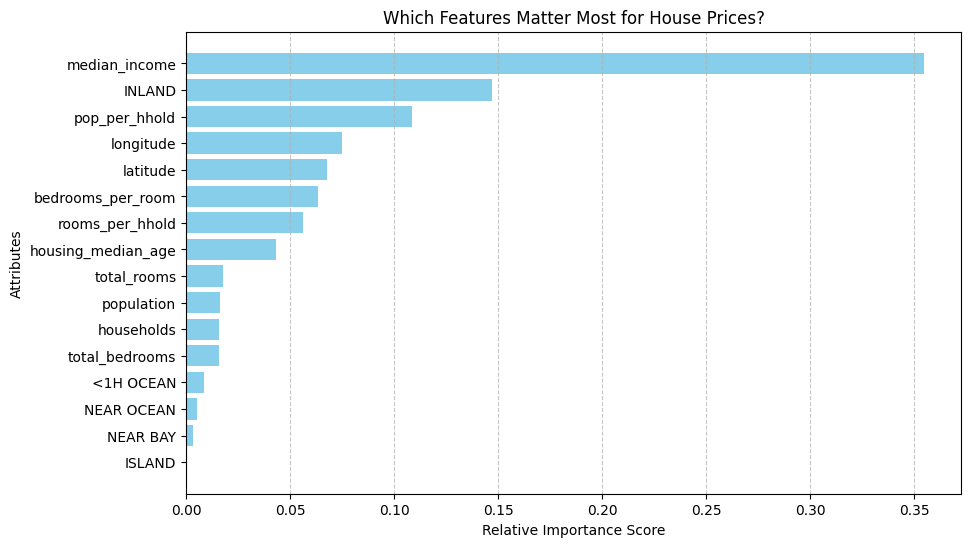

In [69]:
import matplotlib.pyplot as plt

feature_importances_sorted = sorted(zip(feature_importances, attributes), reverse=True)

labels = [item[1] for item in feature_importances_sorted][::-1]
values = [item[0] for item in feature_importances_sorted][::-1]

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color="skyblue")

plt.xlabel("Relative Importance Score")
plt.ylabel("Attributes")
plt.title("Which Features Matter Most for House Prices?")

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**This is really informative, and helps us understand the following:**

1. median_income ($35.5\%$): This is the undisputed champion. Our model discovered that the number one predictor of a house's price is how much money the people in that neighborhood earn.

2. INLAND ($14.7\%$): This is very interesting! Out of all the location categories, the model realized that knowing if a house is "Inland" (vs. near the ocean) is the most critical piece of geographic info. Usually, being inland in California means significantly lower prices.

3. pop_per_hhold ($10.9\%$): This is one of the features we created. The model found that the density of people in a home is more important than the total population of the whole block.

4. longitude & latitude (~$7\%$ each): The exact GPS coordinates are very important. This helps the model identify specific expensive areas (like San Francisco or Beverly Hills) that don't just depend on being near the ocean.

5. bedrooms_per_room ($6.3\%$) is much more important than total_rooms ($1.7\%$).

6. rooms_per_hhold ($5.6\%$) is more important than total_bedrooms ($1.6\%$).

7. ISLAND ($0.01\%$): This is at the very bottom. Because there are so few island properties in the dataset, the model basically ignores this column.

8. NEAR BAY & NEAR OCEAN (~$0.3\% - 0.5\%$): Surprisingly, once the model knows the latitude, longitude, and INLAND status, these specific categories don't add much extra value.

# **Evaluating our System on the Test Set**

In [67]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [68]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46959.52261961, 51446.67994302])

therefore,

**If we put this model into the real world to predict prices for new houses in California, we are 95% certain that the average error will be somewhere between 46,960 and 51,447.**

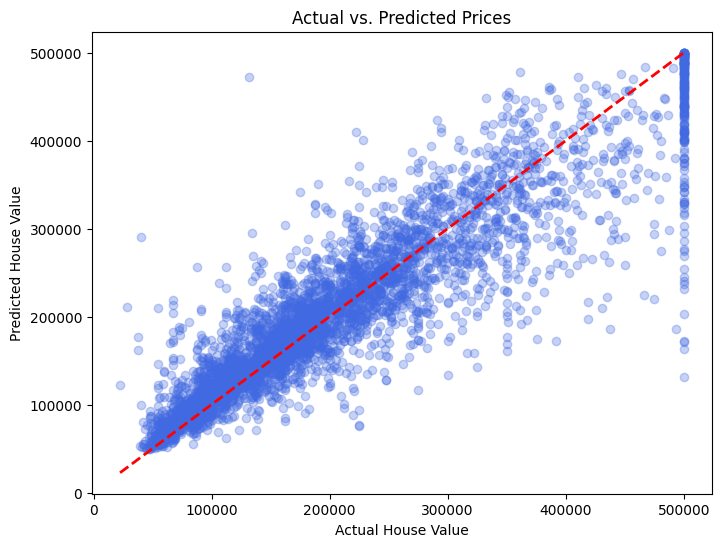

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.3, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs. Predicted Prices")
plt.show()

above graph shows:

**Actual vs. Predicted: Shows the strength of the correlation.**

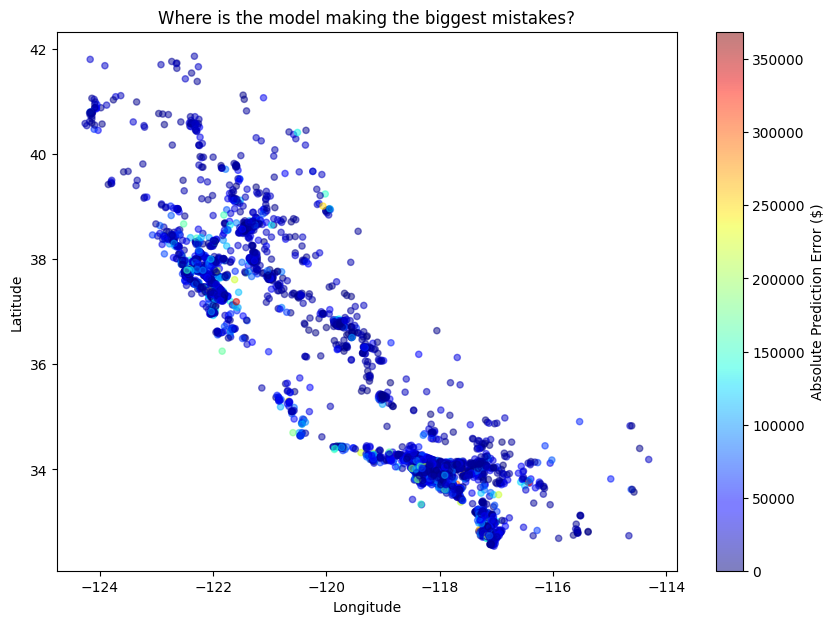

In [71]:
test_set_locations = strat_test_set[["longitude", "latitude"]]

plt.figure(figsize=(10, 7))
error = np.abs(y_test - final_predictions)

plt.scatter(test_set_locations["longitude"], test_set_locations["latitude"],
            c=error, cmap='jet', alpha=0.5, s=20)
plt.colorbar(label="Absolute Prediction Error ($)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Where is the model making the biggest mistakes?")
plt.show()

above graphs shows:

**Error Map: Shows the context of the model (spatial bias).**

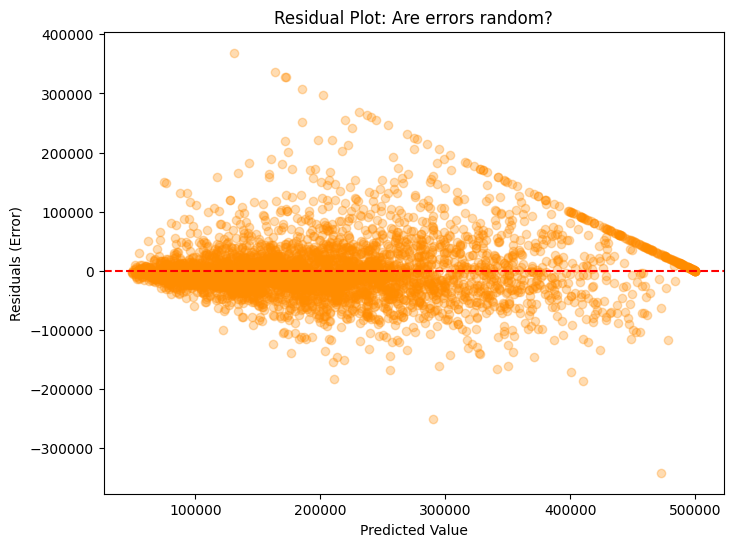

In [72]:
residuals = y_test - final_predictions
plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals, alpha=0.3, color='darkorange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot: Are errors random?")
plt.show()

above graphs shows:

**Residual Plot: Shows the reliability of the model (is it biased?).**